<a href="https://colab.research.google.com/github/RaquelQuei/Pandas_Afrodev.ipynb/blob/main/Pandas_Afrodev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade com Pandas 

In [5]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [6]:
df = pd.read_excel("/content/drive/MyDrive/Afrodev/estudo_io.xlsx")

1. Criar uma nova coluna com a idade das pessoas.
2. Exibir quem tem o maior e o menor saldo bancário.
3. Exibir quem tem o maior e o menor gasto acumulado.
4. Exibir a média de gastos de cada um.

In [7]:
df.sort_values(by= "nome", inplace= True) # reordena o dataframe pela coluna desejada, no caso a col nome

In [8]:
# Substituindo valores nulos por 0
df = df.fillna(0)

#1 - Idade

In [9]:
data_atual = date.today()
ano_atual = data_atual.year
df['idade'] = ano_atual - df['ano nascimento']

In [10]:
# Visualizando 
df

,nome,ano nascimento,saldo bancario,profissão,gastos com moradia,gastos co estudos,gastos com alimentação,idade
6,Daiana,1996,2000.00,0,1376.00,134,5634.0,25
2,Joaquina,1988,30000.00,Médico,1348.00,7641,465.0,33
4,Jorge,1978,12445.50,Dentista,2357.56,1344,498.0,43
0,João,1989,10000.00,Musico,2550.00,5643,0.0,32
3,Maria,2006,50000.00,Professor,3598.00,0,1234.0,15
1,Pedro,2001,15850.00,Cientista,2658.00,4545,0.0,20
5,Renata,1990,60568.55,0,1567.00,4566,137.0,31


# 2 - Maior e o menor saldo bancário.

In [11]:
df[df['saldo bancario']==df['saldo bancario'].max()]

,nome,ano nascimento,saldo bancario,profissão,gastos com moradia,gastos co estudos,gastos com alimentação,idade
5,Renata,1990,60568.55,0,1567.0,4566,137.0,31


In [12]:
df[df['saldo bancario']==df['saldo bancario'].min()]

,nome,ano nascimento,saldo bancario,profissão,gastos com moradia,gastos co estudos,gastos com alimentação,idade
6,Daiana,1996,2000.0,0,1376.0,134,5634.0,25


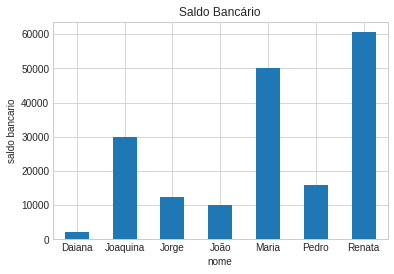

In [13]:
df.groupby("nome")["saldo bancario"].sum().plot.bar(title= "Saldo Bancário")
plt.xlabel("nome")
plt.ylabel("saldo bancario")
plt.xticks(rotation='horizontal'); 

#3 - Gasto acumulado
Neste caso criei colunas, para caso precise dos gastos acumulados de outros não tenha que ficar toda hora fazendo contas.

In [14]:
df['gasto_acumulado'] = df['gastos co estudos'] + df['gastos com moradia'] + df['gastos com alimentação']

In [15]:
df[df['gasto_acumulado']==df['gasto_acumulado'].max()]

,nome,ano nascimento,saldo bancario,profissão,gastos com moradia,gastos co estudos,gastos com alimentação,idade,gasto_acumulado
2,Joaquina,1988,30000.0,Médico,1348.0,7641,465.0,33,9454.0


In [16]:
df[df['gasto_acumulado']==df['gasto_acumulado'].min()]

,nome,ano nascimento,saldo bancario,profissão,gastos com moradia,gastos co estudos,gastos com alimentação,idade,gasto_acumulado
4,Jorge,1978,12445.5,Dentista,2357.56,1344,498.0,43,4199.56


In [17]:
# Visualizando 
df

,nome,ano nascimento,saldo bancario,profissão,gastos com moradia,gastos co estudos,gastos com alimentação,idade,gasto_acumulado
6,Daiana,1996,2000.00,0,1376.00,134,5634.0,25,7144.00
2,Joaquina,1988,30000.00,Médico,1348.00,7641,465.0,33,9454.00
4,Jorge,1978,12445.50,Dentista,2357.56,1344,498.0,43,4199.56
0,João,1989,10000.00,Musico,2550.00,5643,0.0,32,8193.00
3,Maria,2006,50000.00,Professor,3598.00,0,1234.0,15,4832.00
1,Pedro,2001,15850.00,Cientista,2658.00,4545,0.0,20,7203.00
5,Renata,1990,60568.55,0,1567.00,4566,137.0,31,6270.00


#4 - Média de Gastos.
Também criei uma nova coluna, caso precise da média de outros já terei facilmente.

In [18]:
df['media_gastos'] = ((df['gastos co estudos'] + df['gastos com moradia'] + df['gastos com alimentação'])/3).round(2)

In [19]:
df

,nome,ano nascimento,saldo bancario,profissão,gastos com moradia,gastos co estudos,gastos com alimentação,idade,gasto_acumulado,media_gastos
6,Daiana,1996,2000.00,0,1376.00,134,5634.0,25,7144.00,2381.33
2,Joaquina,1988,30000.00,Médico,1348.00,7641,465.0,33,9454.00,3151.33
4,Jorge,1978,12445.50,Dentista,2357.56,1344,498.0,43,4199.56,1399.85
0,João,1989,10000.00,Musico,2550.00,5643,0.0,32,8193.00,2731.00
3,Maria,2006,50000.00,Professor,3598.00,0,1234.0,15,4832.00,1610.67
1,Pedro,2001,15850.00,Cientista,2658.00,4545,0.0,20,7203.00,2401.00
5,Renata,1990,60568.55,0,1567.00,4566,137.0,31,6270.00,2090.00


#Visualizando quem mais gasta com estudos.

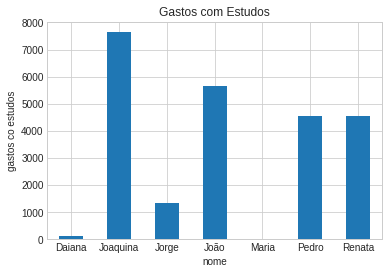

In [20]:
df.groupby("nome")["gastos co estudos"].sum().plot.bar(title= "Gastos com Estudos")
plt.xlabel("nome")
plt.ylabel("gastos co estudos")
plt.xticks(rotation='horizontal'); 

#Visualizando gastos com Alimentação.

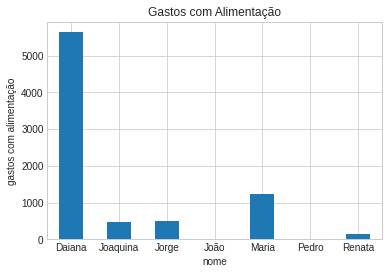

In [21]:
df.groupby("nome")["gastos com alimentação"].sum().plot.bar(title= "Gastos com Alimentação")
plt.xlabel("nome")
plt.ylabel("gastos com alimentação")
plt.xticks(rotation='horizontal'); 